In [352]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [353]:
def plot(x, y, player_names=['Harry Kane'], hue=None):
    if hue is not None:
        sns.scatterplot(x=x, y=y, hue=hue,s=30)
    else:
        sns.scatterplot(x=x, y=y,s=30)
    
    plt.title(f"{x.name} vs {y.name} (2022/23)")
    plt.suptitle(f"Data points: {len(x)}; x-axis avg.: {x.mean():.2f}; y-axis avg.: {y.mean():.2f}", y=.001, fontsize=8)
    plt.axhline(y=y.mean(), color='grey', linestyle='--', linewidth=0.7)
    plt.axvline(x=x.mean(), color='grey', linestyle='--', linewidth=0.7)
    plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.4)
    
    # Highlight specific players
    for name in player_names:
        # Filter data for the specific player
        mask = df['Player'] == name
        x_player = x[mask]
        y_player = y[mask]
        
        # Plot data labels and points for each player
        sns.scatterplot(x=x_player, y=y_player, color='red', edgecolor='red')  # Replot specific points in black
        for i in range(len(x_player)):
            plt.text(x_player.iloc[i], y_player.iloc[i], name, fontsize=10, ha='center', color='red', weight='ultralight')
    plt.show()

### Investigate Forwards
The goal is to plot midfilder on different attributes to indicate clusters that can be approved but domain knowledge.
Consider only players that have played a significant amount of matches and playing minutes.

In [354]:
# Load data
df = pd.read_csv('../data/fbref/player_stats.csv')
#df = df.set_index('unique_id')
df = df.loc[(df['Playing Time_Starts'] > 8 ) & (df['Playing Time_Minutes'] > 60) & (df['Global Pos'] == 'DF') | (df['Global Pos'] == 'FW')]
df = df[df['League'] == 'EPL']
df.columns

# Create plot function

Index(['unique_id', 'Season', 'League', 'Team', 'Player', 'Nation', 'Pos',
       'Age', 'Playing Time_Starts', 'Playing Time_Min',
       ...
       'Receiving_Succ', 'Receiving_PrgR', 'Goals', 'Shots', 'SoT', 'SoT%',
       'Shots/90', 'Goals/Shot', 'Goals/SoT', 'Global Pos'],
      dtype='object', length=175)

Plot midfielder passing qualities

```Forward```
- Aerial Duels_Won vs Shots 
Aerial Duels_Won measures how effective a player is in winning headers, which often reflects their physical presence and ability to challenge for aerial balls.
- SoT% vs Carries_1/3 
shot accuracy at running / movement ?
- Key Passes vs Assists (GI: Shows vision that translates into goals)
Key passes (passes leading to shots) often reflect vision and understanding of the game, while assists directly translate that vision into goals
- Receiving_Succ vs Carries_PrgDist
ability to receive the ball in advanced positions and their ability to move the ball forward once in possession.
High Receiving Success, Low Progressive Carries: This could indicate a player who excels in holding the ball or quickly distributing it without carrying it forward themselves, like a pivot in midfield.
Low Receiving Success, High Progressive Carries: This might suggest a player who can drive forward with the ball but struggles to consistently get into good positions to receive it, possibly due to positioning or being tightly marked.
- Progressive Passes vs Passes_to_Penalty_Area (GI: Passes into penalty area)
Comparing these can show a player's intelligence in knowing when and where to progress the ball effectively.
- Carries_PrgC vs Carries_Dis (GI: Decision making for dribbling)
 A player who progresses the ball a lot but isn’t frequently dispossessed demonstrates effective decision-making when dribbling and ball retention under pressure. This comparison highlights their ability to choose the right moments to carry the ball.
- Carries_PrgC vs Carries_CPA (GI: High values reflect attacking intelligence. recognizing opportunities to take the ball into dangerous positions)
Progressive carries show how well a player moves the ball forward, while carries into the penalty area reflect attacking intelligence. A player with high values for both is often good at recognizing opportunities to take the ball into dangerous positions.
- Receiving_Succ vs Receiving_PrgR
A player’s ability to successfully receive the ball, especially in advanced or dangerous areas (progressive pass receives), reflects positioning intelligence and awareness of space.
- Touches_Att Pen vs Goals/Shot
This shows how efficiently a player converts their opportunities when they are active in the attacking third. A player with a high number of touches in the attacking penalty area who also has a high goals-per-shot ratio is often clinical and intelligent with their chances.

- Passes_to_Penalt_Area - Crs (David Raum - Flanken in den Strafraum)
- SCA Types_TO (Successful take-ons that lead to a shot attempt) vs Receiving_PrgR
- SCA Types_TO (Successful take-ons that lead to a shot attempt)vs Receiving_Succ 
- Receiving_Succ vs Carries_PrgDist

In [355]:
df['Player'].unique()
player_names=['Harry Kane', 'Erling Haaland', 'Cristiano Ronaldo','Ollie Watkins','Bukayo Saka','Mohamed Salah']

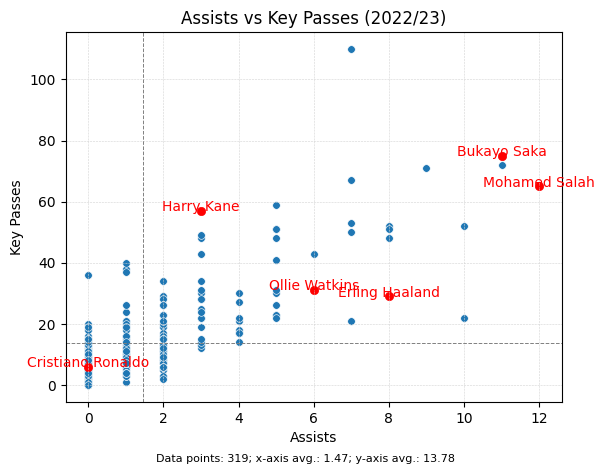

In [356]:
# 'Assists' vs 'Key Passes'
x = df['Assists']
y = df['Key Passes']
plot(x,y,player_names)

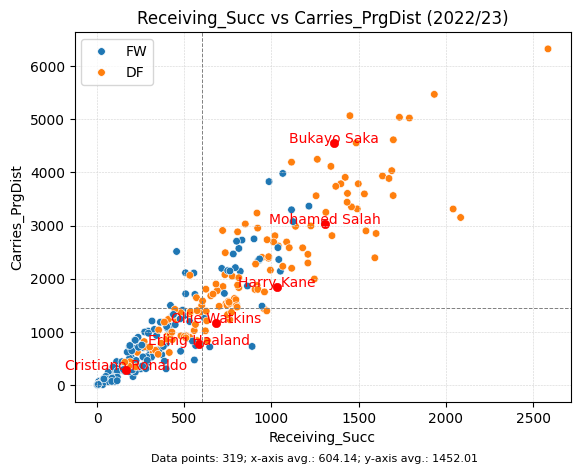

In [357]:
# Receiving_Succ vs Carries_PrgDist
x = df['Receiving_Succ']
y = df['Carries_PrgDist']

plot(x,y,player_names,hue=df['Global Pos'])

In [358]:
# Progressive Passes vs Passes_to_1/3
x = df['Progressive Passes']
y = df['Passes_to_1/3']
plot(x,y,player_names,hue=df['Global Pos'])

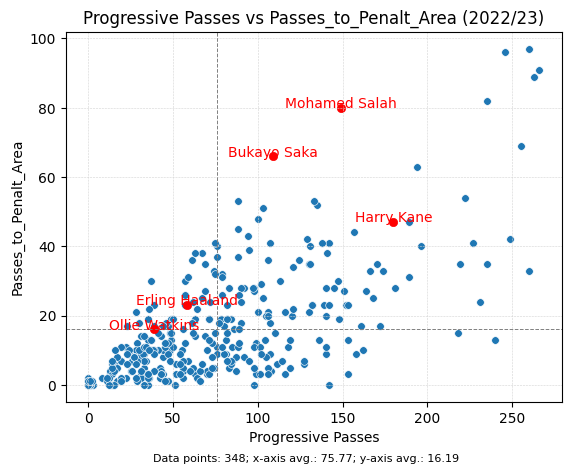

In [ ]:
# Progressive Passes vs Passes_to_Penalty_Area
x = df['Progressive Passes']
y = df['Passes_to_Penalt_Area']
plot(x,y,player_names)

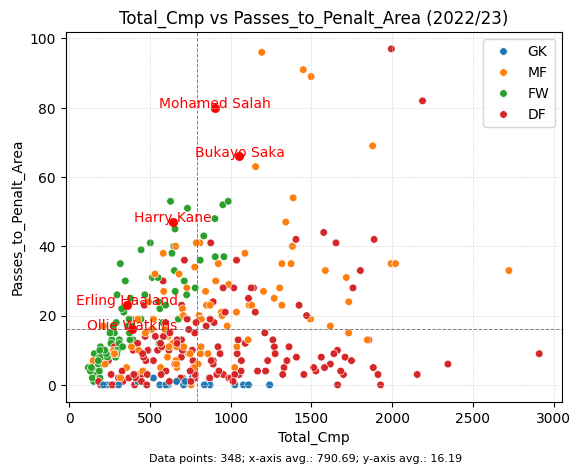

In [ ]:
# Total completed passes vs Passes_to_Penalty_Area
x = df['Total_Cmp'] # completes passes
y = df['Passes_to_Penalt_Area']
plot(x,y,player_names,hue=df['Global Pos'])

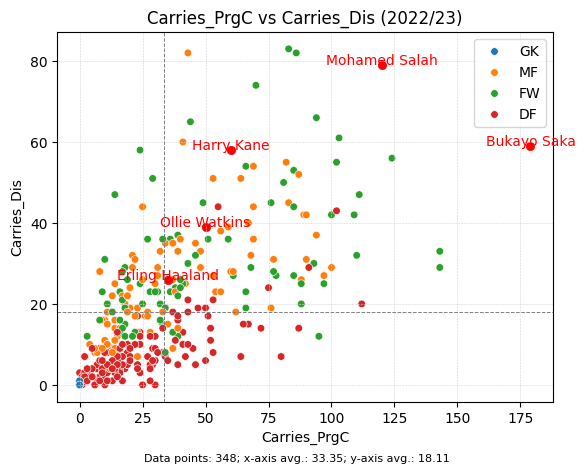

In [ ]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)
x = df['Carries_PrgC'] # number of prog. carries
y = df['Carries_Dis'] # lost ball
plot(x,y,player_names,hue=df['Global Pos'])

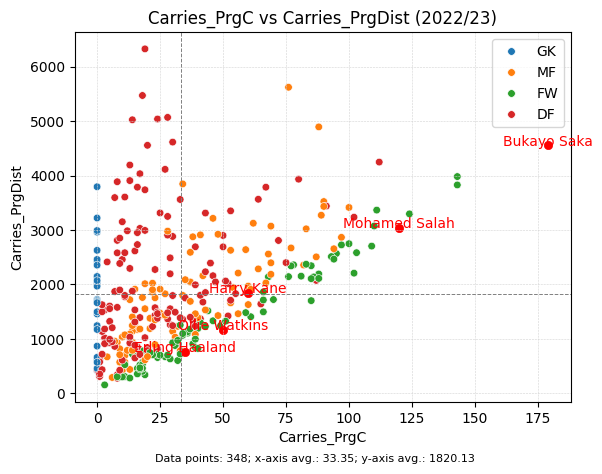

In [ ]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)
x = df['Carries_PrgC'] # number of prog. carries
y = df['Carries_PrgDist'] # distance 
plot(x,y,player_names,hue=df['Global Pos'])

<Axes: xlabel='Carries_PrgDist', ylabel='Density'>

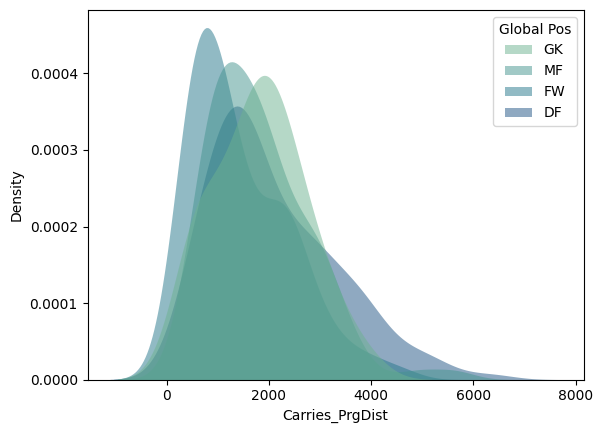

In [ ]:
sns.kdeplot(data=df,x='Carries_PrgDist', hue="Global Pos",
            fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_74008/1564616464.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='Carries_PrgDist', ylabel='Carries_PrgC'>

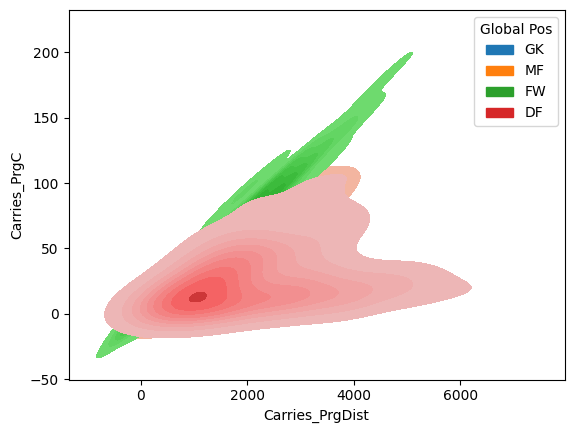

In [ ]:
sns.kdeplot(
    data=df, x="Carries_PrgDist", y="Carries_PrgC", hue="Global Pos", fill=True,
)

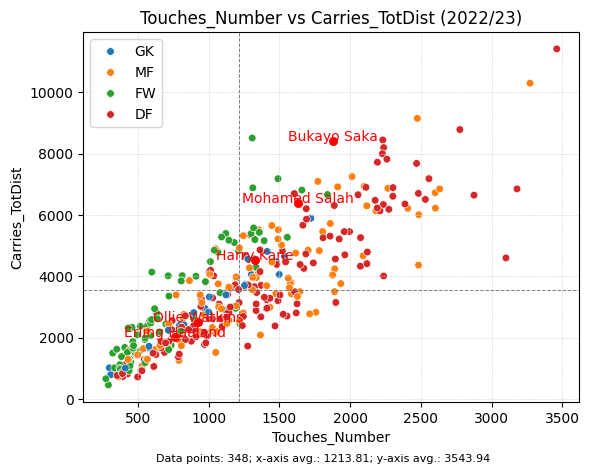

In [ ]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)
x = df['Touches_Number'] # number of prog. carries
y = df['Carries_TotDist'] # distance 
plot(x,y,player_names,hue=df['Global Pos'])

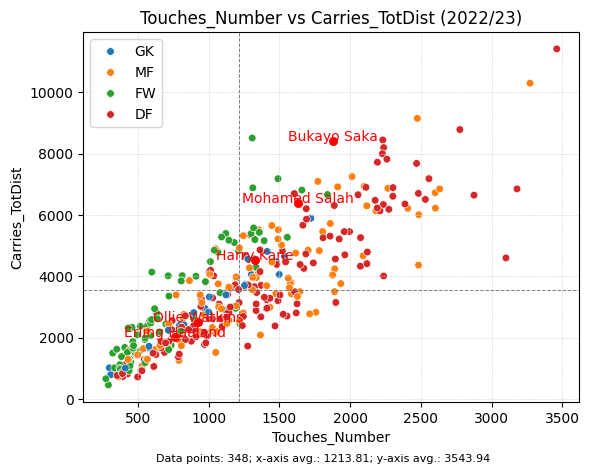

In [ ]:
x = df['Touches_Number'] # number of prog. carries
y = df['Carries_TotDist'] # distance 
plot(x,y,player_names,hue=df['Global Pos'])
